In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [214]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We have successfully uploaded our dataset.

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see, there are 7043 rows and 21 columns in our dataset.

Thre are 18 categorical columns and 3 numerical columns.

`TotalCharges` should be a numerical column while it stored as a categorical one.

`SeniorCitizen` is numerical while it is a binary(only has 0 or 1 as values) column. We can convert it into a categorical one.

In [216]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

It is shown that there are no missing values in the dataset.

In [217]:
new_df = df
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')
new_df['TotalCharges'].isna().sum()

np.int64(11)

We can see that there are 11 missing values, after converting them. Its because there were some values that couldnt be turned into a numeric value. 

In [218]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


We used this function to see the summary of statistic information on numeric datas.

As we can see the mean for `TotalCharges` is `2283.30`. std(Standard Deviation) is `2266.77`, min is `18.8` and max is `8684.80`.

We can undrestand that we have a high standrad deviation which means that values are vary distributed, meaning there are some very high values(outliers). So using mean as a method to replace the `Nan` is not a good option.

In [219]:
df[df['TotalCharges'].isna()]['tenure']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

Based on this observation, we undrestand all of the customers with miising valuse in their `TotalCharges` are new, since their `tenure` is 0 and it mean they are new customers.(In here choosing zero to fill the `Nan` is a good choice)

But we continue with median for now. Median is `1397.45` which is much lower than mean, meaning there are a few very high values pulling the mean up.

We use median to avoid being skewed by outliers.

In [220]:
new_df['TotalCharges'].fillna(new_df['TotalCharges'].median(), inplace=True)
new_df['TotalCharges'].isna().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_19600\1528702300.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['TotalCharges'].fillna(new_df['TotalCharges'].median(), inplace=True)


np.int64(0)

Now that `TotalCharges` is numeric lets move on to exploratory data analysis(EDA).

## EDA

Check for duplicate rows in our dataset. Because duplicates can bias our analysis.

In [221]:
new_df.duplicated().sum()

np.int64(0)

Check fo missing values

In [222]:
new_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Numerical Features

Now, lets explore the data and undrestand the patterns, distributions and relationships.

In [223]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Look for min/max values, skeweness and possible outliers.

By looking at this information, we can undrestand:

`SeniorCitiezen` is bunary which shows us if the citizen is senior or not.

`tenure` ranges from `0` to `72`, indicating some customers are new and joined recently while there are customers with 72 months(6 years) experience with the company. The mean and median are close so it is possiblly normally ditributed.

`MonthlyCharges` ranges from `18.25` to `118.75`, showing a wide variation in the pricing of services. In `MonthlyCharges` mean is `64.76` and median is `70.35`, they are close but becaues max is `118.75` it could be right skewed.

`TotalCharges` ranges from `18.80` to `8684.80`, meaning some customers have spent very little while the others have spent a lot. Mean is much higher than median which suggest it could be strongly right skewed. Also the max is also much bigger than the mean.

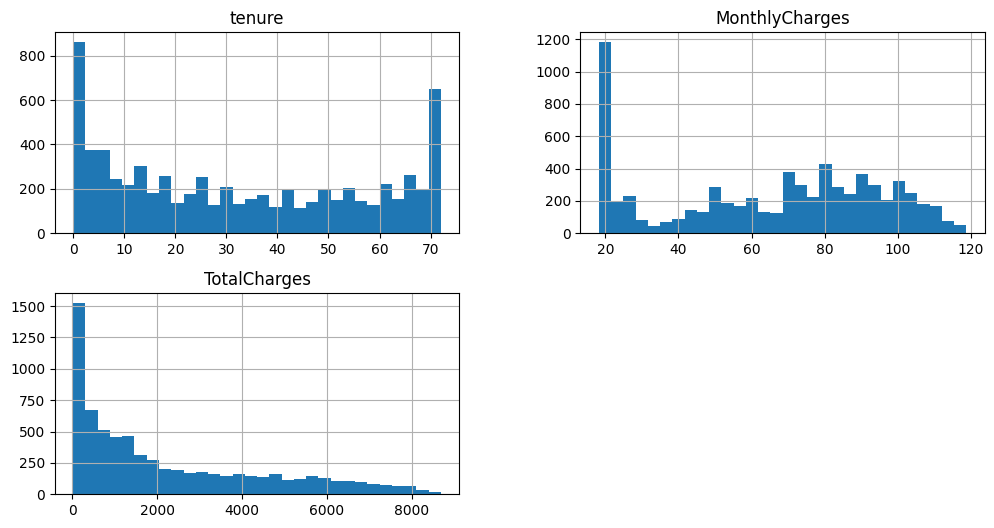

In [224]:
new_df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(12,6))
plt.show()

Based on the hsitograms:

`tenure`:

The distribution is not perfectly normal but it has a bimodal shape(two peaks). One huge spike at 0 months(new customers). Another spike at 70+ months(loyal customers). The middle part is spread relatively evenly.

`MonthlyCharges`:

Slightly right skewed. A large spike around `$20`(new customers). The distribution gradually spreads out toward higher values. A small tail extending towards `$100+`.      

`TotalCharges`:

A large concentration near `0` (new customers with low total charges). A long tail extending towards high values `(~$8000+)`. Strong right-skewness, as expected because TotalCharges = MonthlyCharges × Tenure. New customers have low charges, while long-term customers have very high values.



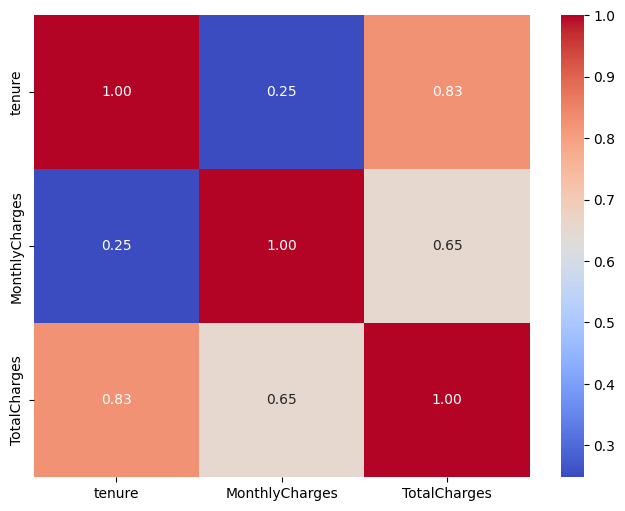

In [225]:
plt.figure(figsize=(8,6))
sns.heatmap(new_df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

We can see:

`tenure` & `TotalCharges`: Strong Positive Correlation → The longer a customer stays, the higher their TotalCharges.

`MonthlyCharges` & `TotalCharges`: Moderate Positive Correlation → Higher monthly charges generally lead to higher total charges.

`tenure` & `MonthlyCharges`: Weak Positive Correlation → Monthly charges don’t strongly depend on tenure.

In [226]:
new_df['TotalCharges'].skew()

np.float64(0.9637890936414893)

We checked the skeweness of `TotalCharges` to see if we need to apply transformation since it was highly right-skewed. Since it is not  bigger than `1`, it is not necessary, but it is still right-skewed and the values are vary greatly(from `18.8` to `8648.8`) we will apply the transformation(log transformation) to make relationships more linear for machine learning.

In [227]:
new_df['TotalCharges_log'] = np.log1p(new_df['TotalCharges'])

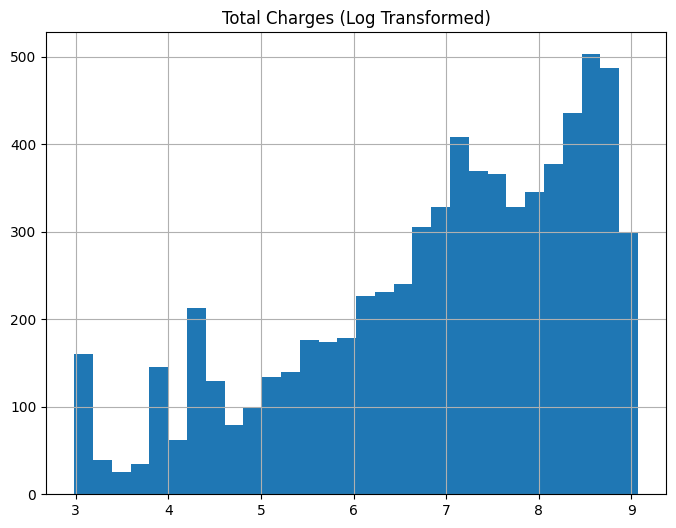

In [228]:
plt.figure(figsize=(8,6))
new_df['TotalCharges_log'].hist(bins=30)
plt.title('Total Charges (Log Transformed)')
plt.show()

The shape is still skewed, but improved. The original `TotalCharges` was highly right-skewed. After log transformation, the distribution is more balanced, though still slightly skewed. The extreme values are compressed.

Previously, there were very large `TotalCharges` values that dominated the spread. Now, those values are compressed into a smaller range, making the distribution more manageable.

Gaps in data still exist. Some gaps suggest discrete values in the dataset, which might come from how `TotalCharges` is calculated (e.g., based on `tenure` and `MonthlyCharges`).

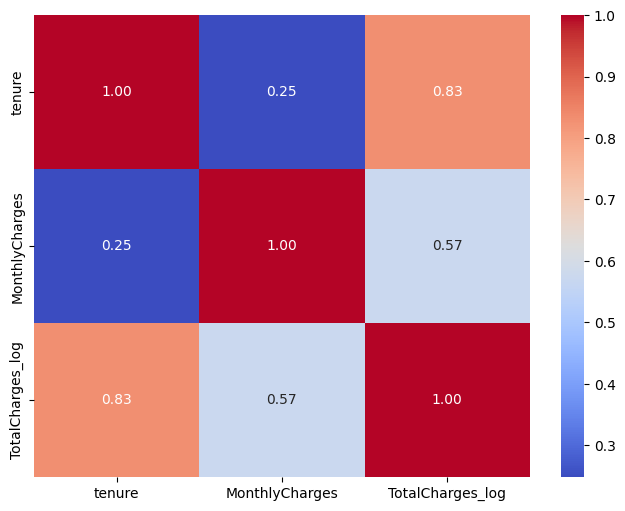

In [229]:
plt.figure(figsize=(8,6))
sns.heatmap(new_df[['tenure', 'MonthlyCharges', 'TotalCharges_log']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Categorical Features

Now lets move to categorical features.

In [230]:
new_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
TotalCharges_log    6531
dtype: int64

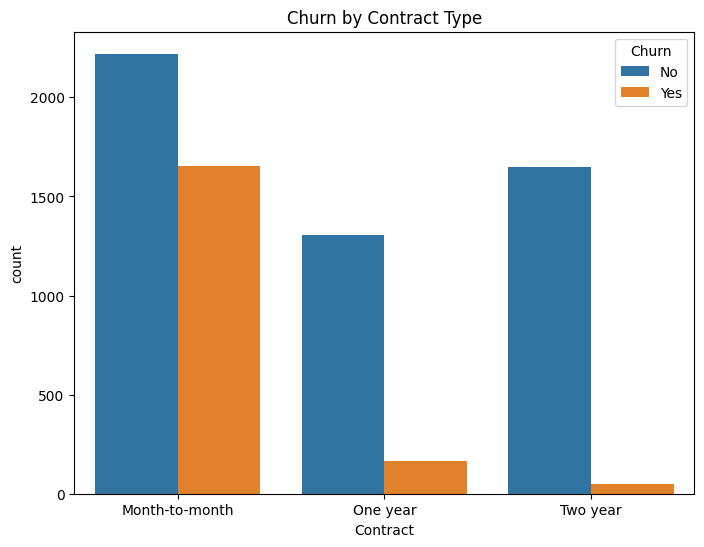

In [231]:
plt.figure(figsize=(8,6))
sns.countplot(data=new_df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

The bar chart clearly shows that customers with month-to-month contracts churn more compared to those with one-year or two-year contracts.

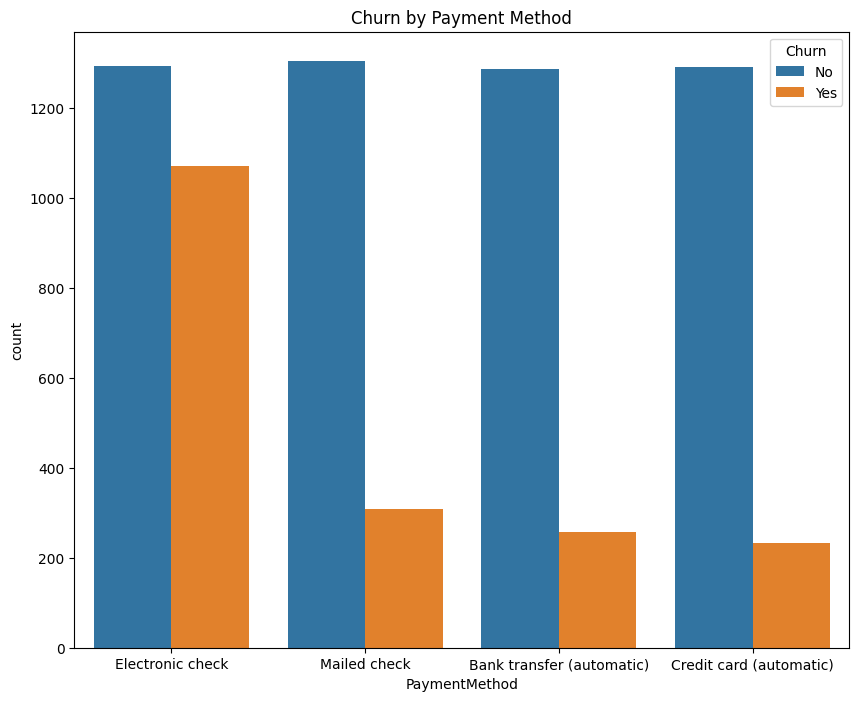

In [232]:
plt.figure(figsize=(10,8))
sns.countplot(data=new_df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.show()

Customers paying via Electronic Check are at the highest risk of churning. Automatic payments (Bank Transfer, Credit Card) are associated with the lowest churn.

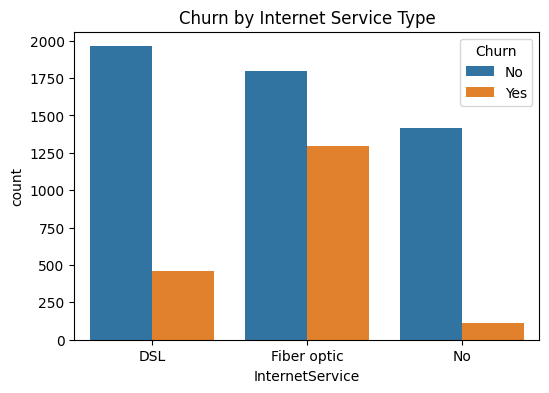

In [233]:
plt.figure(figsize=(6,4))
sns.countplot(data=new_df, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.show()

Fiber Optic customers churn the most—possibly due to higher costs or service issues.
DSL customers are more stable, likely due to affordability and reliability.
Customers without internet service churn the least, possibly because they only use phone-related services.

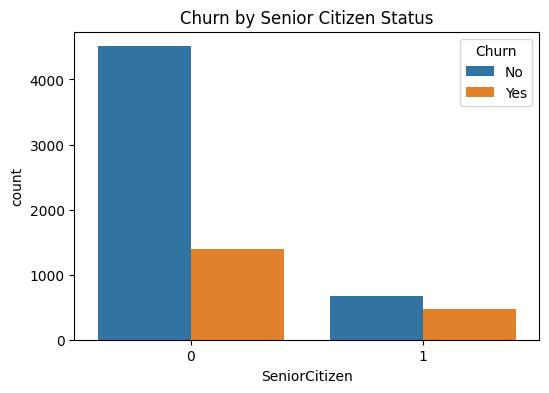

In [234]:
plt.figure(figsize=(6,4))
sns.countplot(data=new_df, x='SeniorCitizen', hue='Churn')
plt.title("Churn by Senior Citizen Status")
plt.show()


Senior citizens have a higher churn rate compared to non-senior citizens.
Non-senior customers are the majority, and they are more likely to stay.

### Checking Churn Impact on Numerical Features

Compare `tenure` for `Churn` vs. Non-Churn Customers

C:\Users\user\AppData\Local\Temp\ipykernel_19600\1255775878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='Churn', y='tenure', palette="coolwarm", notch=True, showmeans=True)


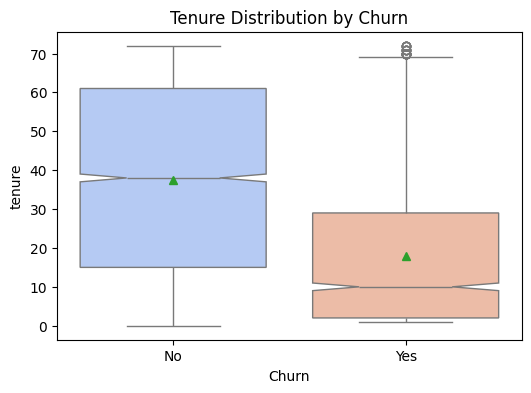

In [235]:
plt.figure(figsize=(6,4))
sns.boxplot(data=new_df, x='Churn', y='tenure', palette="coolwarm", notch=True, showmeans=True)
plt.title("Tenure Distribution by Churn")
plt.show()

1. Mean Indicator (Green Triangle 🔺)

    Now, we can see both the median (central line) and the mean (green triangle).

    The mean for churned customers is lower than for non-churned customers, confirming that shorter tenure leads to higher churn.

2. Notches (Narrow Middle Section)

    The notches represent a confidence interval for the median.

    Since the notches do not overlap, it confirms that there is a statistically significant difference between the median tenure of churned and non-churned customers.

    This means tenure is a strong predictor of churn.

3. Boxplot Interpretation (Insights)

    Churned Customers (Yes):

        Median tenure is very low (~10 months).
    
        Most churned customers have tenure below 20 months.

        A few long-tenure customers still churn (outliers at 70+ months).

    Non-Churned Customers (No):
        
        Median tenure is much higher (~40 months).

        Much wider IQR (more variation in tenure among retained customers).

        The majority have stayed for a long time.


C:\Users\user\AppData\Local\Temp\ipykernel_19600\2436170968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='Churn', y='MonthlyCharges', palette='coolwarm', notch=True, showmeans=True)


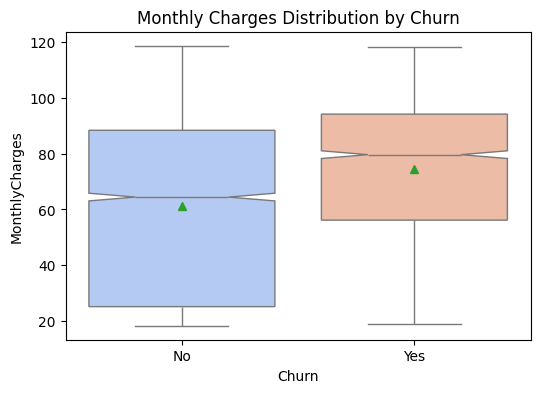

In [236]:
plt.figure(figsize=(6,4))
sns.boxplot(data=new_df, x='Churn', y='MonthlyCharges', palette='coolwarm', notch=True, showmeans=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

1. Higher Monthly Charges Lead to More Churn

    The median MonthlyCharges for churned customers (Yes) is higher (~80-90 USD).

    The median for retained customers (No) is lower (~60 USD).

    This suggests that customers with higher monthly charges are more likely to churn.

2. Customers with Lower Monthly Charges Tend to Stay

    The IQR (box height) for non-churned customers covers a larger range of lower charges.

    Many customers paying below $50 tend to stay, meaning lower-cost plans might have better retention.

3. Higher-Paying Customers Are More at Risk

    The majority of churned customers pay over $70 per month.

    This suggests that expensive plans could be a reason for churn.

    Potentially, these customers found the service too costly or switched to competitors.

4. Similar Upper Limits

    Both groups have similar max values (~120 USD), meaning there are high-paying customers who stay.
    
    However, the distribution is denser at higher values for churned customers.

C:\Users\user\AppData\Local\Temp\ipykernel_19600\1322562707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='Churn', y='TotalCharges_log', palette='coolwarm', notch=True, showmeans=True)


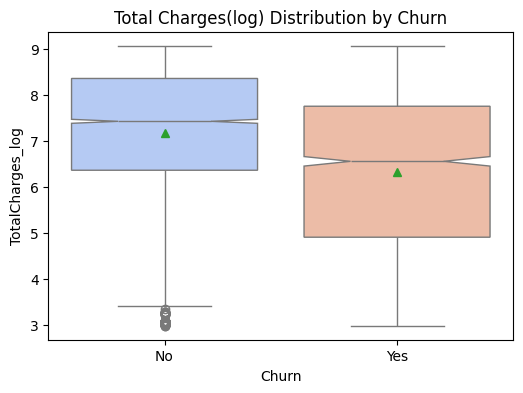

In [237]:
plt.figure(figsize=(6,4))
sns.boxplot(data=new_df, x='Churn', y='TotalCharges_log', palette='coolwarm', notch=True, showmeans=True)
plt.title('Total Charges(log) Distribution by Churn')
plt.show()

1. Total Charges are Lower for Churned Customers

    The median TotalCharges (log) for churned customers is lower than for non-churned customers.

    The mean (green triangle) for churned customers is also slightly lower.
    
    This suggests that customers who churned had lower total spending overall.

2. More Outliers in Non-Churned Customers

    The non-churned group has more outliers (small black dots at the bottom).

    This suggests that some long-term customers have very low TotalCharges, possibly due to discounts or minimal usage.

3. Similar Upper Ranges

    Both groups have similar max values, meaning that some high-spending customers stay, while others leave.

    However, the distribution for churned customers is slightly shifted down.

## Feature Engineering & Data Preparation for Machine Learning

In [238]:
binary_cols = ['Partner', 'Dependents', 'gender', 'Churn', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    new_df[col] = new_df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

In [239]:
# List of features that have "No service" as a category
service_features = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_features:
    # Create a binary column for "Yes" responses
    new_df[f'{col}_Yes'] = new_df[col].apply(lambda x: 1 if x == 'Yes' else 0)
    
    # Create a separate column for "No Service"
    new_df[f'No_{col}'] = new_df[col].apply(lambda x: 1 if x == 'No service' else 0)

# Drop the original columns since we've replaced them
new_df.drop(columns=service_features, inplace=True)


In [240]:
# Apply One-Hot Encoding and drop the first category to avoid dummy variable trap
new_df = pd.get_dummies(new_df, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)

In [241]:
# Convert only Boolean columns to 0/1
bool_cols = new_df.select_dtypes(include=['bool']).columns
new_df[bool_cols] = new_df[bool_cols].astype(int)

# Check if the conversion worked
new_df.dtypes

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
TotalCharges_log                         float64
MultipleLines_Yes                          int64
No_MultipleLines                           int64
OnlineSecurity_Yes                         int64
No_OnlineSecurity                          int64
OnlineBackup_Yes                           int64
No_OnlineBackup                            int64
DeviceProtection_Yes                       int64
No_DeviceProtection                        int64
TechSupport_Yes     

In [242]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,No_StreamingTV,StreamingMovies_Yes,No_StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,1,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,1,0,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,1,0,1,0


##  Feature Scaling (Normalization & Standardization)

In [245]:
numerical_cols = new_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_log', 'MultipleLines_Yes', 'No_MultipleLines', 'OnlineSecurity_Yes', 'No_OnlineSecurity', 'OnlineBackup_Yes', 'No_OnlineBackup', 'DeviceProtection_Yes', 'No_DeviceProtection', 'TechSupport_Yes', 'No_TechSupport', 'StreamingTV_Yes', 'No_StreamingTV', 'StreamingMovies_Yes', 'No_StreamingMovies', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No']


In [246]:
# Select numerical features to scale (exclude binary 0/1 features)
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges_log']

# Apply Standardization (Z-score scaling)
scaler = StandardScaler()
new_df[num_features] = scaler.fit_transform(new_df[num_features])

# Check the scaled data
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,No_StreamingTV,StreamingMovies_Yes,No_StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,-1.160323,29.85,...,0,0,0,0,0,0,1,0,0,0
1,5575-GNVDE,1,0,0,0,0.066327,1,0,-0.259629,1889.50,...,0,0,0,1,0,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,-1.236724,1,1,-0.362660,108.15,...,0,0,0,0,0,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,0.514251,0,0,-0.746535,1840.75,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,-1.236724,1,1,0.197365,151.65,...,0,0,0,0,0,0,1,0,1,0


In [256]:
# Define X (features) and y (target variable)
X = new_df.drop(columns=['Churn'])   # Features
y = new_df['Churn']  # Target variable

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (5634, 32) (5634,)
Testing data shape: (1409, 32) (1409,)


In [257]:
X_train = X_train.drop(columns=['customerID'], errors='ignore')
X_test = X_test.drop(columns=['customerID'], errors='ignore')

### Train the Logistic Regression Model

In [258]:
# Initialize Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Train the model
log_model.fit(X_train, y_train)

c:\Users\user\OneDrive\Desktop\Customer-Churn_Predection\ccp\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Make Predictions

In [260]:
# Predict churn probabilities (for evaluation later)
y_prob = log_model.predict_proba(X_test)[:,1]

# Predict final churn labels
y_pred = log_model.predict(X_test)

# Print first few predictions
print(y_pred[:10]) 

[0 1 0 0 0 1 0 0 0 0]


### Evaluate the Model Performance

In [263]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8027
Precision: 0.6644
Recall: 0.5187
F1 Score: 0.5826


In [266]:
from sklearn.metrics import classification_report

# Adjust threshold (default is 0.5, let's try 0.4)
threshold = 0.4
y_pred_adj = (y_prob >= threshold).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1035
           1       0.60      0.66      0.63       374

    accuracy                           0.79      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.80      0.79      0.80      1409



In [267]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409

